In [1]:
import numpy as np
import h5py
import os

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import matplotlib as mpl
mpl.rcParams['font.size']=16
mpl.rcParams['font.serif'] = "Bitstream Vera Serif"
mpl.rcParams['font.family'] = "serif"

from numpy import polyfit, polyval
from numpy.polynomial.legendre import legfit, legval

In [2]:

def normalize(d):
    x=d.copy()
    x-=x.min()
    return x/(x.max()-x.min())

In [20]:
f=h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/kmeans_clusters/cali_gai/pca10_kmeans55/run121_clustered_shots.h5','r')
qidx=23
print f['q%d'%qidx].keys()

phi_offset = 15

num_phi = 326
qvalue = np.load('/reg/neh/home/qiaoshen/run16_notebooks/encodeZ400_qvalue.npy')[10:33]
exp_cpsi = np.load('/reg/neh/home/qiaoshen/run16_notebooks/encodeZ400_cpsi.npy')[10:33,phi_offset:num_phi/2-phi_offset]

[u'asym', u'ave_clus_cor', u'ave_cor', u'clus_nshots', u'norm_shots_0', u'norm_shots_1', u'norm_shots_10', u'norm_shots_11', u'norm_shots_12', u'norm_shots_13', u'norm_shots_14', u'norm_shots_2', u'norm_shots_3', u'norm_shots_4', u'norm_shots_5', u'norm_shots_6', u'norm_shots_7', u'norm_shots_9']


In [21]:
asym_kmeans=f['q%d'%qidx]['asym'].value
print np.argsort(asym_kmeans)[::-1]
print len(np.argsort(asym_kmeans)[::-1])

[10  2  5  4  1 11 13  8 12  9  0  3  7  6]
14


In [22]:
print exp_cpsi.shape
f['q%d'%qidx]['ave_clus_cor'][9].shape

(23, 133)


(326,)

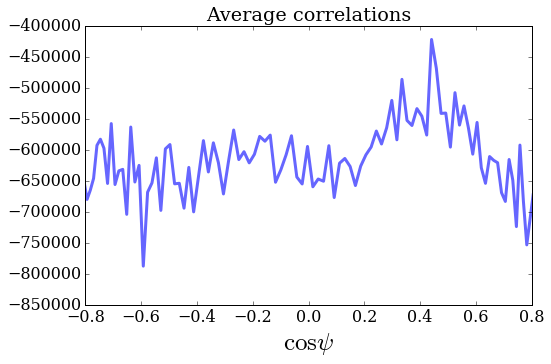

In [23]:
plt.figure(figsize=[8,5])

plt.plot(exp_cpsi[qidx-10],f['q%d'%qidx]['ave_cor'][phi_offset:num_phi/2-phi_offset], 
         linewidth=3, alpha=0.6, color='b')
plt.xlim(-0.8,0.8)
plt.title('Average correlations')
plt.xlabel('$\cos{\psi}$', fontsize=25)

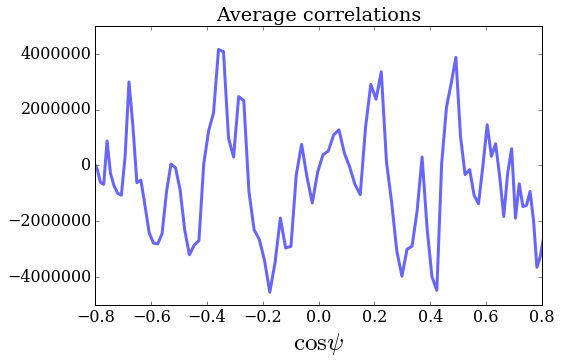

In [37]:
plt.figure(figsize=[8,5])

plt.plot(exp_cpsi[qidx-10],f['q%d'%qidx]['ave_clus_cor'][1,phi_offset:num_phi/2-phi_offset], 
         linewidth=3, alpha=0.6, color='b')
# plt.plot(exp_cpsi[qidx-10],f['q%d'%qidx]['ave_clus_cor'][4,phi_offset:num_phi/2-phi_offset], 
#          linewidth=3, alpha=0.6, color='b')
plt.xlim(-0.8,0.8)
plt.title('Average correlations')
plt.xlabel('$\cos{\psi}$', fontsize=25)

In [13]:
f['q%d'%qidx]['norm_shots_11'].value.mean(-1).mean()

1.1011990606954576e-14

In [31]:
f['q%d'%qidx]['norm_shots_0']

<HDF5 dataset "norm_shots_0": shape (8688, 326), type "<f8">